Bike Sharing Model

Problem statement::
        
You are required to model the demand for shared bikes with the available independent variables.
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Importing the required librarires

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [80]:
df_bike = pd.read_csv("day.csv")

In [81]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [82]:
df_bike.shape

(730, 16)

In [83]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Looking at the dataset we can see that instant features is used for indexing and dteday column is used for date 
and we have seperate column for month and year so we can proceed without these columns.

# Checking for NUll values 

In [85]:
df_bike.isnull().count()

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

As we don't have any null values in the data , no meed for its treatment.

# Creating new dataframe

In [86]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Dropping of columns like instant , dteday , casual , registered

In [87]:
df_bike_new = df_bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [88]:
df_bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Performing Data Analyses

In [89]:
df_bike_new.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [90]:
df_bike_new.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [91]:
df_bike_new.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [92]:
df_bike_new.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

# Data Preparation and Data Visualization

In [93]:
# Converting Season values to string 

df_bike_new.loc[(df_bike_new['season'] == 1 ) , 'season'] = 'spring'

df_bike_new.loc[(df_bike_new['season'] == 2 ) , 'season'] = 'summer'

df_bike_new.loc[(df_bike_new['season'] == 3 ) , 'season'] = 'autumn'

df_bike_new.loc[(df_bike_new['season'] == 4 ) , 'season'] = 'winter'



In [94]:
df_bike_new.season.value_counts()

autumn    188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [95]:
# Assigning the months with string inplace of numericals

def convert_mn(x):
    return x.map({1:'Jan', 2:"Feb" , 3: "March" , 4:"April" , 5: "May" , 6: "June" , 7:"July" , 8:"August" , 9: "Sep" , 10:"Oct", 11:"Nov" , 12:"Dec"})

df_bike_new[['mnth']] = df_bike_new[['mnth']].apply(convert_mn)

In [96]:
df_bike_new[['mnth']].value_counts()

mnth  
August    62
Dec       62
Jan       62
July      62
March     62
May       62
Oct       62
April     60
June      60
Nov       60
Sep       60
Feb       56
dtype: int64

In [97]:
# Assigning the weekday with string inplace of numericals

def convert_wd(x):
    return x.map({1:'Wed', 2:"Thurs" , 3: "Friday" , 4:"Sat" , 5: "Sun" , 6: "Mon" , 7:"Tues"})

df_bike_new[['weekday']] = df_bike_new[['weekday']].apply(convert_wd)

In [98]:
df_bike_new[['weekday']].value_counts()

weekday
Thurs      105
Wed        105
Friday     104
Mon        104
Sat        104
Sun        104
dtype: int64

In [99]:
df_bike_new.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [100]:
# Assigning the weathersit with string inplace of numericals
# For 1 - Clear 
# For 2 - Mist
# For 3 - Snow
# for 4 - Rain
def convert_ws(x):
    return x.map({1:'Clear', 2:"Mist" , 3: "Snow" , 4:"Rain"})

df_bike_new[['weathersit']] = df_bike_new[['weathersit']].apply(convert_ws)

In [101]:
df_bike_new[['weathersit']].value_counts()

weathersit
Clear         463
Mist          246
Snow           21
dtype: int64

In [102]:
# Converting Catergorical Integer Columns to Object Type 

colmn =['season', 'mnth', 'weekday', 'weathersit']

def categorical(colmn):
    for i in colmn:
        df_bike_new[i] = df_bike_new[i].astype("category")
        
categorical(colmn)        
        

In [103]:
# creating Dummies for Categorical variables 

def dummies():
    df_dummyset= df_bike_new[['season', 'mnth', 'weekday', 'weathersit']]
    df_dummyset = pd.get_dummies(df_dummyset , drop_first = True)
    return df_dummyset

df_new = dummies()    

    

In [104]:
df_bike_new = pd.concat([df_bike_new , df_new] , axis=1)

df_bike_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Wed', 'weathersit_Mist', 'weathersit_Snow'],
      dtype='object')

# Univariate Analysis

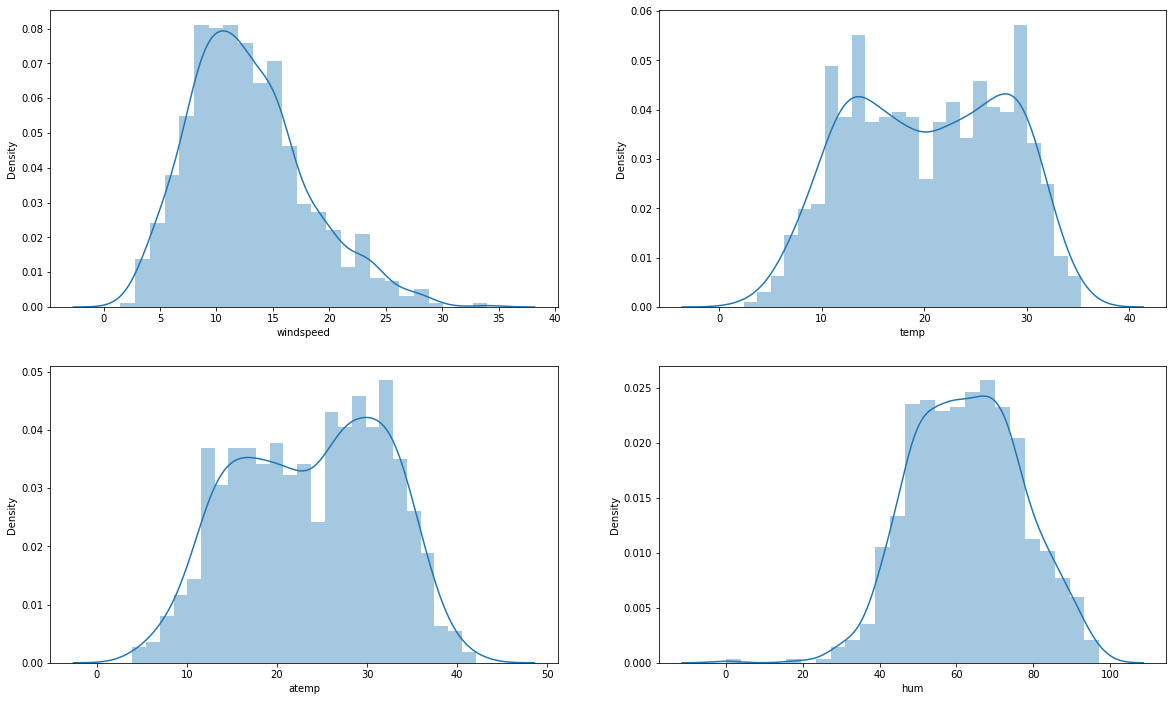

In [105]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.distplot(df_bike_new['windspeed'],bins = 25)
plt.subplot(2,2,2)
sns.distplot(df_bike_new['temp'],bins = 25)
plt.subplot(2,2,3)
sns.distplot(df_bike_new['atemp'],bins = 25)
plt.subplot(2,2,4)
sns.distplot(df_bike_new['hum'],bins = 25)
plt.show()

Windspeed: This feature seems to be little bit right skewed with median around 10.

Temp And Atemp: These two features seems to be correlated as there is similarity in there distribution
    
Humidity: This is a bit left skewed with median ranging around 60.

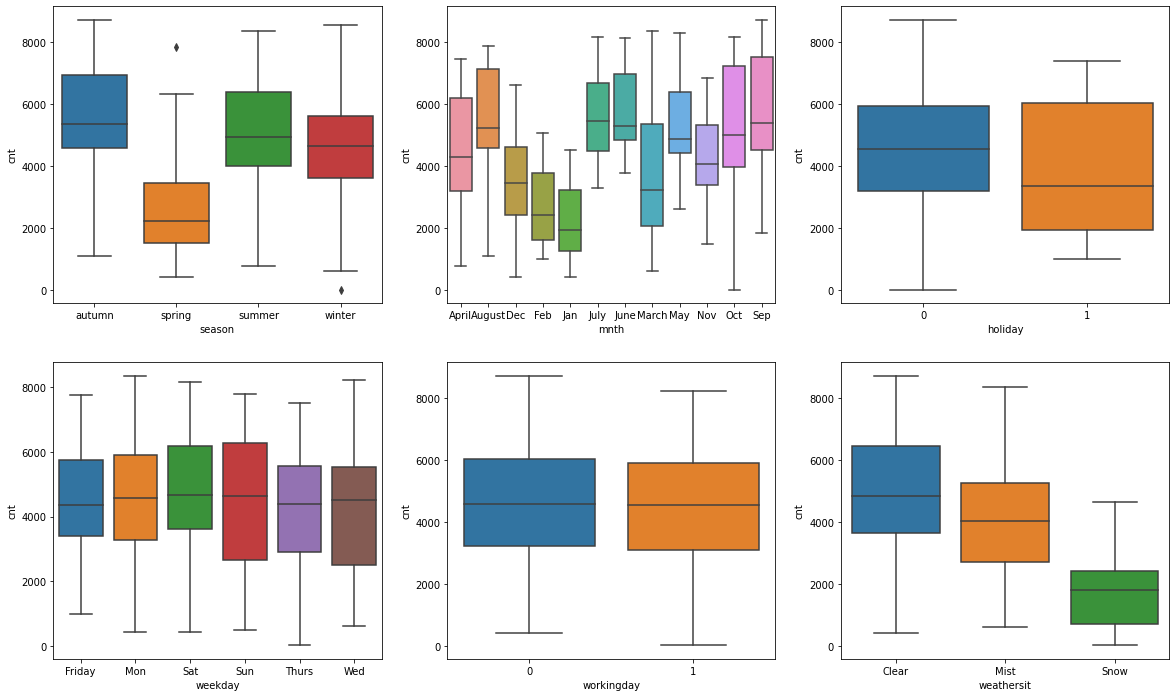

In [106]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike_new)
plt.show()

Based on these categorical features we can infer the following :

SEASON: Most of the booking were happening in Autumn with median between 4000 and 6000, followed by Spring and Winter. Indicating season is a good predictor for the dependent variable.

MONTH: Most of the booking is taking place in May , June , July , August , September.Thus being a good indicator.

Holiday: Indicating most of the booking taking place on holiday but could be because of missing information for 2018. Thus Holiday is not the good predictor.

Weekday: It's showing that booking being very close to each other for all days of the week. Thus , this could not be good predictor.

Workingday: Most of the booking is being done in workingday , thus could be a good predictor.

WeatherSuit: Most of the booking is done in Clear weather, with medain close to 5000, followed by Mist and Snowy weather.

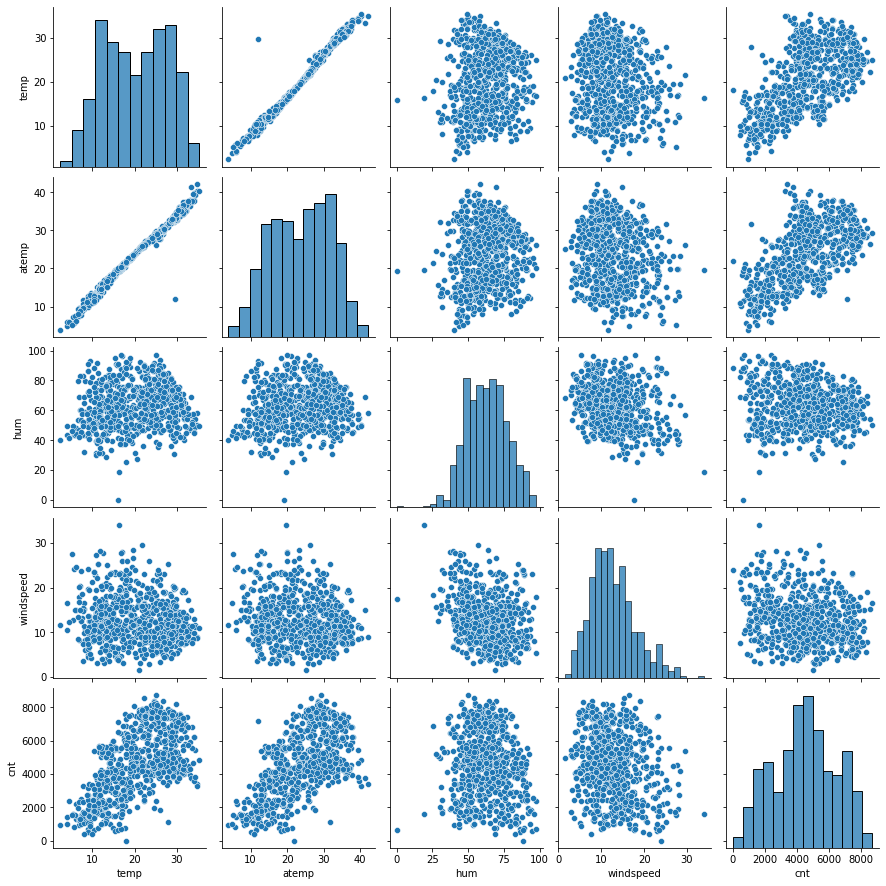

In [107]:
num_colmn = ["temp" , 'atemp' , "hum" ,"windspeed" , "cnt"]

sns.pairplot(df_bike_new[num_colmn])
# plt.show()

From the pair plot we can infer that temp and atemp are linearly correlated.
While other features are so linearly related.


# Correlation Matrix

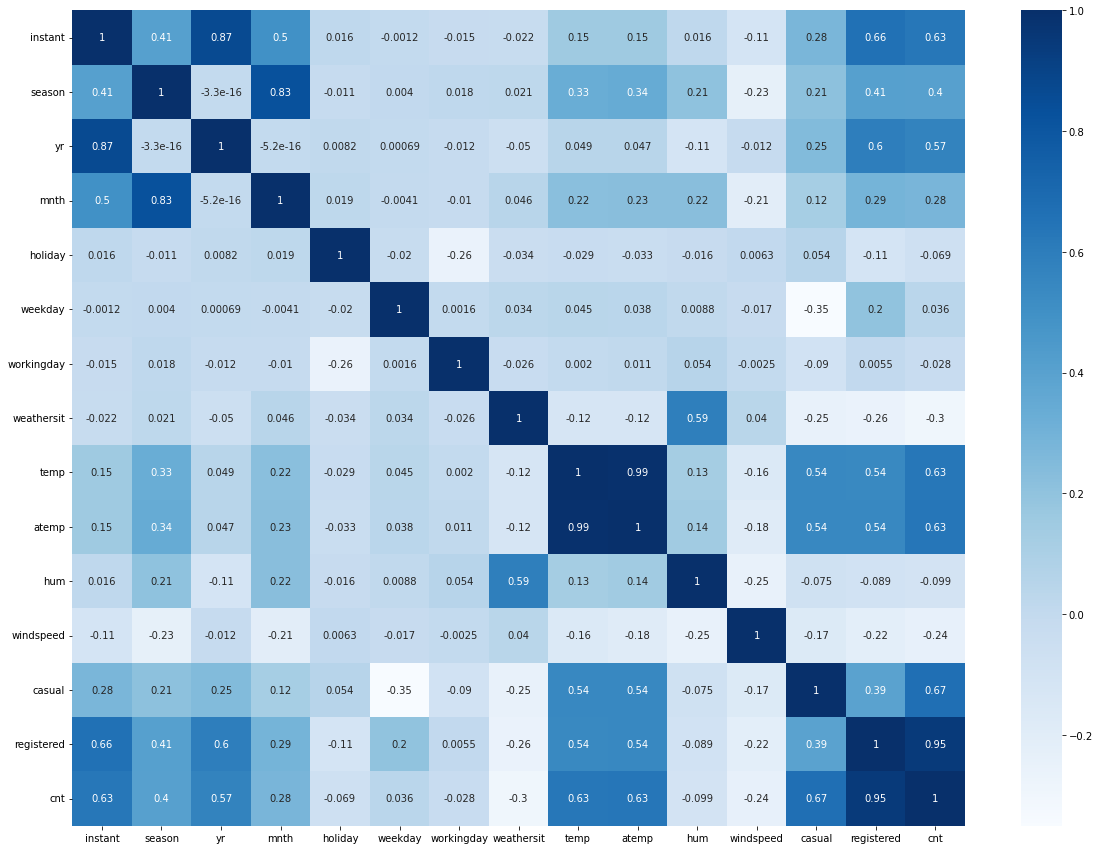

In [108]:
plt.figure(figsize = (20,15))
sns.heatmap(df_bike.corr(), annot = True, cmap="Blues")
plt.show()

It seems that the variables are correlated to each other so for building model will need to look on p-value and VIF of the feature

# Dropping the columns whose dummy is created

In [109]:
df_bike_new.drop(['season'], axis = 1, inplace = True)

In [110]:
df_bike_new.drop(['mnth'], axis = 1, inplace = True)

In [111]:
df_bike_new.drop(['weathersit'], axis = 1, inplace = True)

In [112]:
df_bike_new.drop(['weekday'], axis = 1, inplace = True)

In [113]:
df_bike_new.shape

(730, 29)

# Splitting the Data

In [114]:
df_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_spring    730 non-null    uint8  
 9   season_summer    730 non-null    uint8  
 10  season_winter    730 non-null    uint8  
 11  mnth_August      730 non-null    uint8  
 12  mnth_Dec         730 non-null    uint8  
 13  mnth_Feb         730 non-null    uint8  
 14  mnth_Jan         730 non-null    uint8  
 15  mnth_July        730 non-null    uint8  
 16  mnth_June        730 non-null    uint8  
 17  mnth_March      

In [115]:
df_bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Mist,weathersit_Snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_bike_new, train_size = 0.7, test_size = 0.3, random_state = 79)

# Scaling the data set

# Using Min_Max Scaler to rescale the dataset

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler()

In [119]:

num_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_features] = scaler.fit_transform(df_train[num_features])

In [120]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Mist,weathersit_Snow
601,1,0,0,0.738612,0.700562,0.733077,0.434483,0.693856,0,0,...,0,0,0,0,0,0,0,0,1,0
259,0,0,1,0.516432,0.511649,0.738646,0.316818,0.516452,0,0,...,0,0,1,0,0,0,0,1,1,0
632,1,0,1,0.592670,0.600143,0.586118,0.417098,0.864703,0,0,...,0,0,1,0,0,0,0,0,0,0
72,0,0,1,0.298891,0.314209,0.511010,0.203418,0.232858,1,0,...,0,0,0,0,0,0,0,0,0,0
565,1,0,0,0.744056,0.692920,0.868038,0.358292,0.672803,0,0,...,0,0,0,1,0,0,0,0,1,0


In [121]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Mist,weathersit_Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.029412,0.660784,0.520531,0.504460,0.641800,0.321054,0.516355,0.258824,0.256863,...,0.084314,0.072549,0.086275,0.150980,0.145098,0.143137,0.137255,0.125490,0.333333,0.025490
std,0.500456,0.169124,0.473908,0.236052,0.216421,0.146433,0.173879,0.223800,0.438419,0.437332,...,0.278131,0.259649,0.281045,0.358381,0.352545,0.350557,0.344454,0.331599,0.471867,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318757,0.322160,0.539580,0.194173,0.357800,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.525144,0.518051,0.639935,0.298774,0.517027,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.730715,0.686110,0.743168,0.414415,0.685861,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
df_train.shape

(510, 29)

 # Dividing into X and Y sets for model building

In [123]:
y_train = df_train.pop('cnt')
X_train = df_train

In [124]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Mist,weathersit_Snow
601,1,0,0,0.738612,0.700562,0.733077,0.434483,0,0,0,...,0,0,0,0,0,0,0,0,1,0
259,0,0,1,0.516432,0.511649,0.738646,0.316818,0,0,0,...,0,0,1,0,0,0,0,1,1,0
632,1,0,1,0.592670,0.600143,0.586118,0.417098,0,0,1,...,0,0,1,0,0,0,0,0,0,0
72,0,0,1,0.298891,0.314209,0.511010,0.203418,1,0,0,...,0,0,0,0,0,0,0,0,0,0
565,1,0,0,0.744056,0.692920,0.868038,0.358292,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Building a linear model

In [125]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [126]:
linear = LinearRegression()

linear.fit(X_train, y_train)

rfe= RFE(linear, 20)

rfe= rfe.fit(X_train , y_train)

In [127]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 8),
 ('mnth_March', False, 5),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thurs', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_Snow', True, 1)]

In [128]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Thurs',
       'weekday_Wed', 'weathersit_Mist', 'weathersit_Snow'],
      dtype='object')

In [129]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_August', 'mnth_June', 'mnth_March',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun'],
      dtype='object')

In [130]:
X_train_rfe = X_train[col] 

# Checking VIF

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,313.94
2,temp,300.63
4,hum,24.19
7,season_winter,7.84
6,season_spring,5.04
5,windspeed,4.08
13,mnth_Nov,4.00
14,mnth_Oct,3.51
8,mnth_Dec,2.70
10,mnth_Jan,2.62


Model 1

In [133]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [134]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.45e-188
Time:                        20:25:39   Log-Likelihood:                 527.82
No. Observations:                 510   AIC:                            -1014.
Df Residuals:                     489   BIC:                            -924.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3976      0.030     13.105      0.000       0.338       0.457
yr                  0.2323      0.008     29.120      0.000       0.217       0.248
holiday            -0.0937      0.023     -4.010      0.000      -0.140      -0.048
temp                0.3135      0.118      2.658      0.008       0.082       0.545
atemp               0.0984      0.127      0.776      0.438      -0.151       0.348
hum                -0.1678      0.037     -4.590      0.000      -0.240      -0.096
windspeed          -0.1658      0.025     -6.707      0.000      -0.214      -0.117
season_spring      -0.0869      0.018     -4.828      0.000      -0.122      -0.052
season_winter       0.0612      0.023      2.657      0.008       0.016       0.106
mnth_Dec           -0.0312      0.023     -1.380      0.168      -0.076       0.013
mnth_Feb           -0.0373      0.021     -1.786      0.075      -0.078       0.004
mnth_Jan           -0.0631      0.021     -2.970      0.003      -0.105      -0.021
mnth_July          -0.0406      0.016     -2.474      0.014      -0.073      -0.008
mnth_May            0.0392      0.016      2.469      0.014       0.008       0.070
mnth_Nov           -0.0476      0.027     -1.766      0.078      -0.100       0.005
mnth_Oct            0.0411      0.027      1.517      0.130      -0.012       0.094
mnth_Sep            0.0614      0.016      3.774      0.000       0.029       0.093
weekday_Thurs      -0.0328      0.012     -2.850      0.005      -0.055      -0.010
weekday_Wed        -0.0442      0.012     -3.686      0.000      -0.068      -0.021
weathersit_Mist    -0.0462      0.010     -4.582      0.000      -0.066      -0.026
weathersit_Snow    -0.2548      0.028     -9.237      0.000      -0.309      -0.201
==============================================================================
Omnibus:                       60.047   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.897
Skew:                          -0.648   Prob(JB):                     2.28e-29
Kurtosis:                       5.128   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see we have , high atemp value for VIF and p_value , then we can remove it 


In [135]:
X_train_new = X_train_rfe.drop(["atemp"] , axis=1)

Model 2

In [136]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.29
2,temp,15.33
6,season_winter,7.79
5,season_spring,5.02
4,windspeed,4.04
12,mnth_Nov,4.00
13,mnth_Oct,3.51
7,mnth_Dec,2.70
9,mnth_Jan,2.62
8,mnth_Feb,2.29


In [137]:
import statsmodels.api as sm

# Add a constant
X_train_lm_1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [138]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.68e-189
Time:                        20:25:41   Log-Likelihood:                 527.50
No. Observations:                 510   AIC:                            -1015.
Df Residuals:                     490   BIC:                            -930.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4010      0.030     13.364      0.000       0.342       0.460
yr                  0.2321      0.008     29.122      0.000       0.216       0.248
holiday            -0.0944      0.023     -4.043      0.000      -0.140      -0.049
temp                0.4017      0.031     12.836      0.000       0.340       0.463
hum                -0.1660      0.036     -4.551      0.000      -0.238      -0.094
windspeed          -0.1689      0.024     -6.929      0.000      -0.217      -0.121
season_spring      -0.0867      0.018     -4.819      0.000      -0.122      -0.051
season_winter       0.0623      0.023      2.708      0.007       0.017       0.107
mnth_Dec           -0.0317      0.023     -1.403      0.161      -0.076       0.013
mnth_Feb           -0.0373      0.021     -1.788      0.074      -0.078       0.004
mnth_Jan           -0.0638      0.021     -3.008      0.003      -0.105      -0.022
mnth_July          -0.0400      0.016     -2.438      0.015      -0.072      -0.008
mnth_May            0.0398      0.016      2.509      0.012       0.009       0.071
mnth_Nov           -0.0479      0.027     -1.781      0.076      -0.101       0.005
mnth_Oct            0.0412      0.027      1.523      0.128      -0.012       0.094
mnth_Sep            0.0610      0.016      3.754      0.000       0.029       0.093
weekday_Thurs      -0.0324      0.012     -2.819      0.005      -0.055      -0.010
weekday_Wed        -0.0438      0.012     -3.658      0.000      -0.067      -0.020
weathersit_Mist    -0.0464      0.010     -4.605      0.000      -0.066      -0.027
weathersit_Snow    -0.2555      0.028     -9.274      0.000      -0.310      -0.201
==============================================================================
Omnibus:                       59.179   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.202
Skew:                          -0.639   Prob(JB):                     5.33e-29
Kurtosis:                       5.120   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we have high VIF value for hum , then we can drop it

In [139]:
X_train_new_1 = X_train_new.drop(["hum"] , axis=1)

Model 3

In [140]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_1.values, i) for i in range(X_train_new_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_winter,7.60
2,temp,5.09
4,season_spring,4.58
3,windspeed,4.02
11,mnth_Nov,3.89
12,mnth_Oct,3.49
6,mnth_Dec,2.54
8,mnth_Jan,2.44
7,mnth_Feb,2.24
0,yr,2.09


In [141]:
import statsmodels.api as sm

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_new_1)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

In [142]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          5.16e-186
Time:                        20:25:43   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     491   BIC:                            -915.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3157      0.024     13.208      0.000       0.269       0.363
yr                  0.2369      0.008     29.393      0.000       0.221       0.253
holiday            -0.0918      0.024     -3.857      0.000      -0.139      -0.045
temp                0.3712      0.031     11.905      0.000       0.310       0.432
windspeed          -0.1402      0.024     -5.838      0.000      -0.187      -0.093
season_spring      -0.0887      0.018     -4.835      0.000      -0.125      -0.053
season_winter       0.0593      0.023      2.531      0.012       0.013       0.105
mnth_Dec           -0.0446      0.023     -1.946      0.052      -0.090       0.000
mnth_Feb           -0.0419      0.021     -1.970      0.049      -0.084      -0.000
mnth_Jan           -0.0739      0.022     -3.437      0.001      -0.116      -0.032
mnth_July          -0.0359      0.017     -2.150      0.032      -0.069      -0.003
mnth_May            0.0264      0.016      1.658      0.098      -0.005       0.058
mnth_Nov           -0.0565      0.027     -2.061      0.040      -0.110      -0.003
mnth_Oct            0.0307      0.028      1.118      0.264      -0.023       0.085
mnth_Sep            0.0481      0.016      2.949      0.003       0.016       0.080
weekday_Thurs      -0.0367      0.012     -3.138      0.002      -0.060      -0.014
weekday_Wed        -0.0443      0.012     -3.629      0.000      -0.068      -0.020
weathersit_Mist    -0.0716      0.009     -8.318      0.000      -0.088      -0.055
weathersit_Snow    -0.3027      0.026    -11.627      0.000      -0.354      -0.252
==============================================================================
Omnibus:                       54.649   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.988
Skew:                          -0.617   Prob(JB):                     4.81e-25
Kurtosis:                       4.936   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we have high VIF value for temp , then we can drop it

In [143]:
X_train_new_2 = X_train_new_1.drop(['season_winter'] , axis=1)

Model 4

In [144]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.08
3,windspeed,4.02
4,season_spring,3.96
7,mnth_Jan,2.25
0,yr,2.08
6,mnth_Feb,2.08
15,weathersit_Mist,1.51
8,mnth_July,1.51
12,mnth_Sep,1.31
9,mnth_May,1.27


In [145]:
import statsmodels.api as sm

# Add a constant
X_train_lm= sm.add_constant(X_train_new_2)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [146]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          9.60e-186
Time:                        20:25:44   Log-Likelihood:                 513.64
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     492   BIC:                            -915.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3286      0.023     13.993      0.000       0.282       0.375
yr                  0.2380      0.008     29.420      0.000       0.222       0.254
holiday            -0.0948      0.024     -3.965      0.000      -0.142      -0.048
temp                0.3574      0.031     11.579      0.000       0.297       0.418
windspeed          -0.1445      0.024     -6.001      0.000      -0.192      -0.097
season_spring      -0.1080      0.017     -6.444      0.000      -0.141      -0.075
mnth_Dec           -0.0081      0.018     -0.450      0.653      -0.043       0.027
mnth_Feb           -0.0298      0.021     -1.430      0.153      -0.071       0.011
mnth_Jan           -0.0633      0.021     -2.985      0.003      -0.105      -0.022
mnth_July          -0.0359      0.017     -2.137      0.033      -0.069      -0.003
mnth_May            0.0238      0.016      1.490      0.137      -0.008       0.055
mnth_Nov           -0.0037      0.018     -0.206      0.837      -0.039       0.031
mnth_Oct            0.0859      0.017      5.092      0.000       0.053       0.119
mnth_Sep            0.0609      0.016      3.900      0.000       0.030       0.092
weekday_Thurs      -0.0373      0.012     -3.173      0.002      -0.060      -0.014
weekday_Wed        -0.0452      0.012     -3.686      0.000      -0.069      -0.021
weathersit_Mist    -0.0722      0.009     -8.358      0.000      -0.089      -0.055
weathersit_Snow    -0.3071      0.026    -11.758      0.000      -0.358      -0.256
==============================================================================
Omnibus:                       50.826   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.906
Skew:                          -0.595   Prob(JB):                     3.33e-22
Kurtosis:                       4.800   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we have high VIF of temp , then removing it

In [147]:
X_train_new_3 = X_train_new_2.drop(["temp"] , axis=1)

Model 5

In [148]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,3.93
2,windspeed,2.88
6,mnth_Jan,2.22
5,mnth_Feb,2.07
0,yr,1.81
14,weathersit_Mist,1.46
4,mnth_Dec,1.25
9,mnth_Nov,1.18
11,mnth_Sep,1.18
8,mnth_May,1.17


In [149]:
import statsmodels.api as sm

# Add a constant
X_train_lm_final= sm.add_constant(X_train_new_3)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm_final).fit()

In [150]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          3.21e-161
Time:                        20:25:46   Log-Likelihood:                 452.19
No. Observations:                 510   AIC:                            -870.4
Df Residuals:                     493   BIC:                            -798.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5626      0.013     41.742      0.000       0.536       0.589
yr                  0.2496      0.009     27.589      0.000       0.232       0.267
holiday            -0.0891      0.027     -3.308      0.001      -0.142      -0.036
windspeed          -0.1760      0.027     -6.527      0.000      -0.229      -0.123
season_spring      -0.1774      0.018    -10.051      0.000      -0.212      -0.143
mnth_Dec           -0.0977      0.018     -5.380      0.000      -0.133      -0.062
mnth_Feb           -0.0836      0.023     -3.655      0.000      -0.128      -0.039
mnth_Jan           -0.1492      0.022     -6.666      0.000      -0.193      -0.105
mnth_July           0.0411      0.017      2.370      0.018       0.007       0.075
mnth_May            0.0307      0.018      1.710      0.088      -0.005       0.066
mnth_Nov           -0.1029      0.018     -5.835      0.000      -0.138      -0.068
mnth_Oct            0.0504      0.019      2.696      0.007       0.014       0.087
mnth_Sep            0.0772      0.018      4.404      0.000       0.043       0.112
weekday_Thurs      -0.0438      0.013     -3.313      0.001      -0.070      -0.018
weekday_Wed        -0.0516      0.014     -3.730      0.000      -0.079      -0.024
weathersit_Mist    -0.0787      0.010     -8.100      0.000      -0.098      -0.060
weathersit_Snow    -0.3304      0.029    -11.261      0.000      -0.388      -0.273
==============================================================================
Omnibus:                       37.876   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.013
Skew:                          -0.587   Prob(JB):                     8.37e-12
Kurtosis:                       4.012   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now the model seems to be good with low multicollinearity between features , also p-values for all these seems to be significant enough.So, we can keep this model as final for now 

Also the p-value of F-statistics is also near to zero , signifying that the overall model is significant.

# Residual Analysis of Training Data

In [151]:
y_train_pred = lr_4.predict(X_train_lm_final)

Text(0.5, 0, 'Errors')

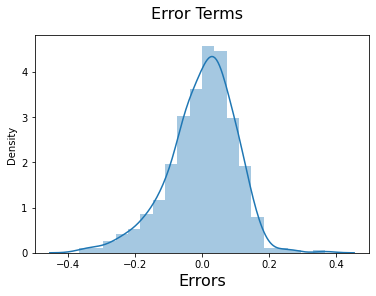

In [152]:
res = y_train - y_train_pred

fig=  plt.figure()
sns.distplot((res), bins=20)
fig.suptitle("Error Terms" , fontsize=16)
plt.xlabel("Errors" , fontsize= 16)


# Assumption 1 :
Since , this histogram of residuals is normally distributed, our assumptions are valid.

In [153]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,3.93
2,windspeed,2.88
6,mnth_Jan,2.22
5,mnth_Feb,2.07
0,yr,1.81
14,weathersit_Mist,1.46
4,mnth_Dec,1.25
9,mnth_Nov,1.18
11,mnth_Sep,1.18
8,mnth_May,1.17


# Assumption 2:
From the VIF table we could see that there is low multicollinearity between predictors.

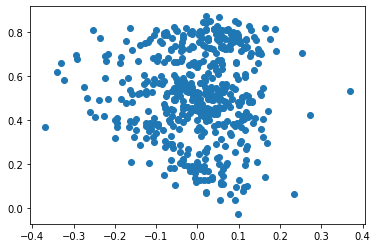

In [154]:
plt.scatter(res,y_train_pred)
plt.show()

# Assumption 3:
Since , the residual points are distributed equally without a pattern that means its homoscedasticity.

# Assumption 4:
Based on the Durbin-Watson value which is 2.041 ~ 2 , means perfect no auto correlation

Thus , it validates all the assumptions for Linear Regression Model.

# Scaling the test dataset

In [155]:

num_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_features] = scaler.transform(df_test[num_features])

In [156]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Mist,weathersit_Snow
128,0,0,1,0.569798,0.574628,0.605398,0.287420,0.499310,0,1,...,0,0,0,0,0,0,0,0,0,0
698,1,0,0,0.263756,0.303249,0.667952,0.034755,0.649563,0,0,...,1,0,0,1,0,0,0,0,0,0
638,1,0,1,0.554550,0.556778,0.667524,0.104265,0.777266,0,0,...,0,1,0,0,0,0,1,0,1,0
654,1,0,1,0.469599,0.473372,0.712511,0.126982,0.855844,0,0,...,0,1,0,0,1,0,0,0,0,0
584,1,0,1,0.854058,0.820527,0.691946,0.147038,0.864243,0,0,...,0,0,0,0,1,0,0,0,1,0


In [157]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Mist,weathersit_Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.488584,0.027397,0.757991,0.525277,0.511793,0.654348,0.312451,0.516223,0.219178,0.242009,...,0.077626,0.114155,0.073059,0.123288,0.136986,0.141553,0.159817,0.182648,0.347032,0.036530
std,0.501015,0.163612,0.429281,0.246941,0.227166,0.146384,0.149208,0.221021,0.414637,0.429281,...,0.268194,0.318728,0.260830,0.329520,0.344621,0.349389,0.367276,0.387263,0.477117,0.188034
min,0.000000,0.000000,0.000000,-0.048868,-0.026641,0.370609,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.307320,0.322512,0.523779,0.211209,0.370053,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.541481,0.546542,0.660668,0.298115,0.531178,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.734799,0.692491,0.768423,0.405063,0.677117,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.969504,0.937920,0.997858,0.716557,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating X-test and Y-test

In [158]:
y_test = df_test.pop("cnt")
X_test = df_test

In [159]:
col1= X_train_new_3.columns
X_test = X_test[col1]

X_test_linear4 = sm.add_constant(X_test)


In [160]:
X_test_linear4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 128 to 394
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   holiday          219 non-null    int64  
 3   windspeed        219 non-null    float64
 4   season_spring    219 non-null    uint8  
 5   mnth_Dec         219 non-null    uint8  
 6   mnth_Feb         219 non-null    uint8  
 7   mnth_Jan         219 non-null    uint8  
 8   mnth_July        219 non-null    uint8  
 9   mnth_May         219 non-null    uint8  
 10  mnth_Nov         219 non-null    uint8  
 11  mnth_Oct         219 non-null    uint8  
 12  mnth_Sep         219 non-null    uint8  
 13  weekday_Thurs    219 non-null    uint8  
 14  weekday_Wed      219 non-null    uint8  
 15  weathersit_Mist  219 non-null    uint8  
 16  weathersit_Snow  219 non-null    uint8  
dtypes: float64(2),

In [161]:
y_pred= lr_4.predict(X_test_linear4)

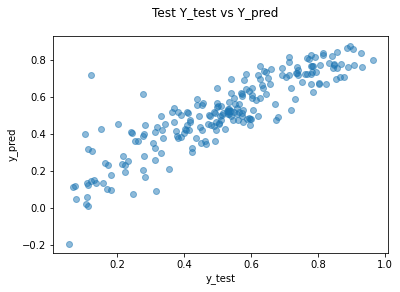

In [162]:
fig = plt.figure()
plt.scatter(y_test , y_pred, alpha=0.5)
fig.suptitle("Test Y_test vs Y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Evaluating R^2 value for test data

In [163]:
from sklearn.metrics import r2_score

r2=r2_score(y_test, y_pred)

In [164]:
r2

0.7801223643756134

Now the test data r^2 is similar to train data r^2 (80.1).

 # Evaluating Adjusted R^2 value for test data

In [165]:
# No. of rows in the data set
n = X_test.shape[0]

# No. of features in the data set
p = X_test.shape[1]

adjusted_R2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_R2

0.7627063140291274

Now the test data adjusted r^2 is similar to train data adjusted r^2 (79.5).

# Comparison between Train and Test Values

* Train R^2: 0.801
* Test R^2: 0.780
* Train Adjusted R^2: 0.762
* Test Adjusted R^2: 0.79.5

This meant that the model is generalizing the datasets and good at predictions.

We can see that the equation of our best fitted line is:

cnt = 0.2496*yr + (-0.0891)*holiday + (-0.1760)*windspeed + (-0.01774)*season_spring + (-0.0977)*mnth_Dec + (-0.0836)*mnth_Feb+ (-0.1492)*mnth_Jan + 0.0411*mnth_July + 0.0307*mnth_May + (-0.1029)*mnth_Nov + 0.0504*mnth_Oct + 0.0772*mnth_Sep + (-0.0438)*weekday_Thurs + (-0.0516)*weekday_Wed + (-0.0787)*weathersit_Mist + (-0.3304)*weathersit_Snow + 0.5626 